In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
from scipy import stats
from scipy.stats import chi2_contingency, skew
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, Perceptron, SGDClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.neighbors import LocalOutlierFactor
from math import sqrt
import math


# 🗂️📥📊 Q1) Import the dataset: 

In [3]:
df = pd.read_csv('insurance.csv')
df

,age,gender,bmi,children,smoker,area,price
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   area      1338 non-null   object 
 6   price     1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
price,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# After loading the dataset, we obtained an overview of the data, which consists of 1,338 records and 7 features. Additionally, I used the describe method to gain statistical insights into the numeric variables.

# 🖥️📑 Q2) Display records: 

In [8]:
original_df = df.copy()

In [7]:
df.head(5)

,age,gender,bmi,children,smoker,area,price
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.tail(5)

,age,gender,bmi,children,smoker,area,price
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# we got 5 first and 5 last records to get more idea about what the data is about. 

# 📋🔢 Q3) Identify data types: 

In [10]:
df.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
area         object
price       float64
dtype: object

In [15]:
for i in df.columns:
    print(i, ':', '\n')
    print(df[i].value_counts(normalize=True)*100, '\n')  
    print('*' * 40) 

age : 

age
18    5.156951
19    5.082212
50    2.167414
51    2.167414
47    2.167414
46    2.167414
45    2.167414
20    2.167414
48    2.167414
52    2.167414
22    2.092676
49    2.092676
54    2.092676
53    2.092676
21    2.092676
26    2.092676
24    2.092676
25    2.092676
28    2.092676
27    2.092676
23    2.092676
43    2.017937
29    2.017937
30    2.017937
41    2.017937
42    2.017937
44    2.017937
31    2.017937
40    2.017937
32    1.943199
33    1.943199
56    1.943199
34    1.943199
55    1.943199
57    1.943199
37    1.868460
59    1.868460
58    1.868460
36    1.868460
38    1.868460
35    1.868460
39    1.868460
61    1.718984
60    1.718984
63    1.718984
62    1.718984
64    1.644245
Name: proportion, dtype: float64 

****************************************
gender : 

gender
male      50.523169
female    49.476831
Name: proportion, dtype: float64 

****************************************
bmi : 

bmi
32.300    0.971599
28.310    0.672646
30.495    0.597907
30.8

In [16]:
for i in df:
    print(i, ':', '\n')
    print(df[i].nunique(), '\n')  
    print('*' * 40) 

age : 

47 

****************************************
gender : 

2 

****************************************
bmi : 

548 

****************************************
children : 

6 

****************************************
smoker : 

2 

****************************************
area : 

4 

****************************************
price : 

1337 

****************************************


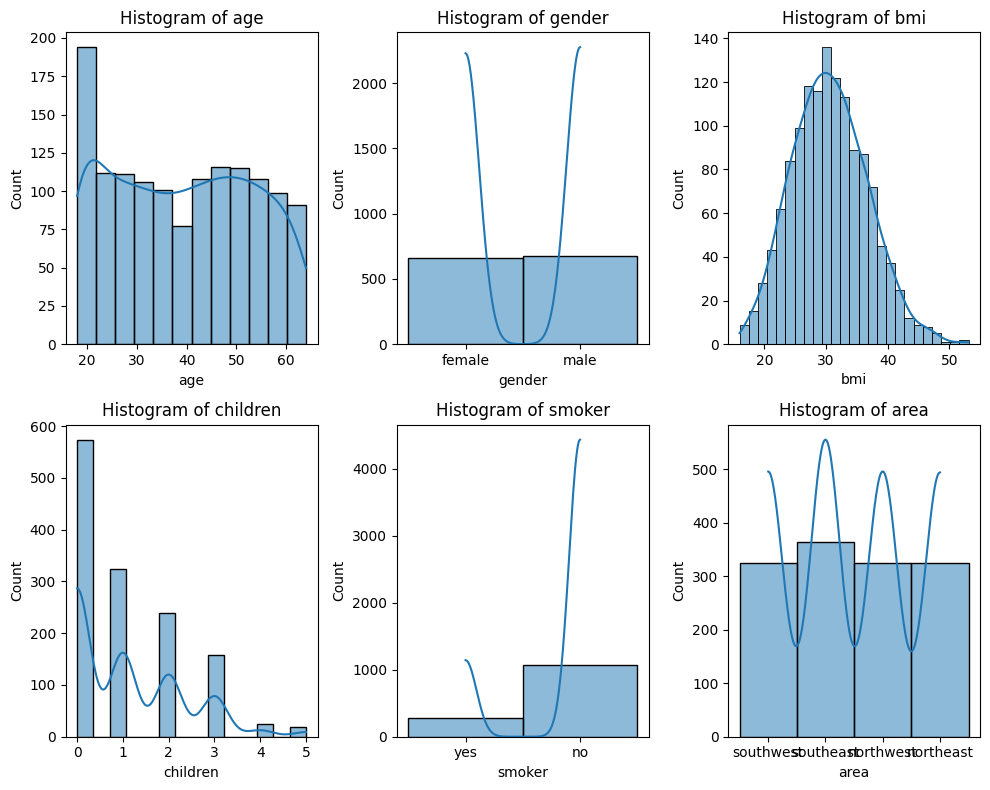

In [17]:
fig, ax = plt.subplots(2,3, figsize = (10, 8 ))
axes = ax.flatten()

for i, col in enumerate(df.drop('price', axis=1).columns):
     sns.histplot(data=df, x=col, kde=True, ax=axes[i])
     axes[i].set_title(f'Histogram of {col}')
    
plt.tight_layout()  
plt.show()

In [18]:
num_vars = df.select_dtypes(include='number').columns.tolist()
num_vars

['age', 'bmi', 'children', 'price']

In [19]:
cat_vars = df.select_dtypes(include='object').columns.tolist() 
cat_vars

['gender', 'smoker', 'area']

# After inspecting all variables using plots, as well as the value_counts() and nunique() methods, I identified the categorical variables as ['gender', 'smoker', 'area'] and the numeric variables as ['age', 'bmi', 'children', 'price']. The target variable is 'price'.

# ❓📉 Q4) Missing entries:

In [20]:
df.isna().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
area        0
price       0
dtype: int64

# The data does not have any missing value.

# 🔄📑 Q5) Duplicate records: 

In [21]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [22]:
df.duplicated().sum()

1

In [23]:
dup_df = df[df.duplicated()]
dup_df

,age,gender,bmi,children,smoker,area,price
581,19,male,30.59,0,no,northwest,1639.5631


In [24]:
nodup_df=df.drop_duplicates()
nodup_df

,age,gender,bmi,children,smoker,area,price
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
df.shape, nodup_df.shape

((1338, 7), (1337, 7))

# The data has one duplicate recore. Duplicated recored is for row 581. After deleting duplicated record, we have 1337 rows and 7 columns.

# 📈🧐 Q6) Univariate Analysis:

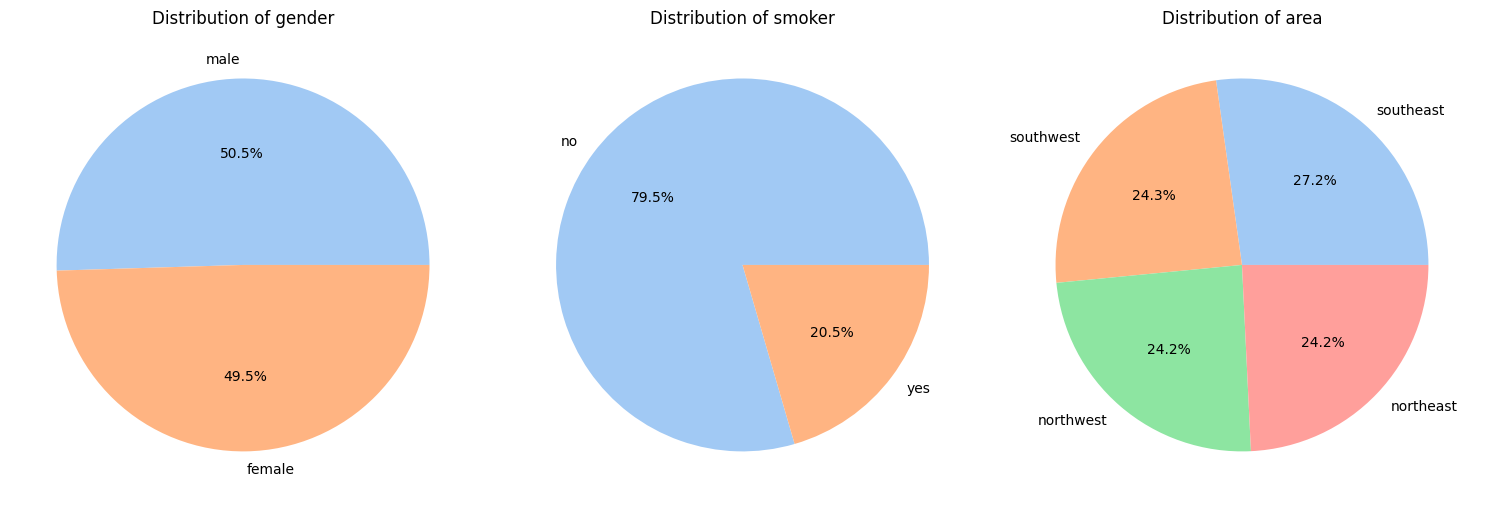

In [26]:
cat_vars = nodup_df.select_dtypes(include='object').columns.tolist() 

plt.figure(figsize=(15, 5))

for i, col in enumerate(cat_vars, 1):
    plt.subplot(1, 3, i)
    counts = nodup_df[col].value_counts(normalize=True) * 100
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Distribution of {col}') 
plt.tight_layout()  
plt.show() 


# I created a series of pie charts using a subplot layout to visualize the categorical variable distributions. In the gender distribution, males represent the largest portion, accounting for 50.5%. For the smoker variable, the majority is composed of non-smokers ('no'), making up 79.5%. The area distribution highlights the proportions across four regions, with each region contributing its respective share of the total

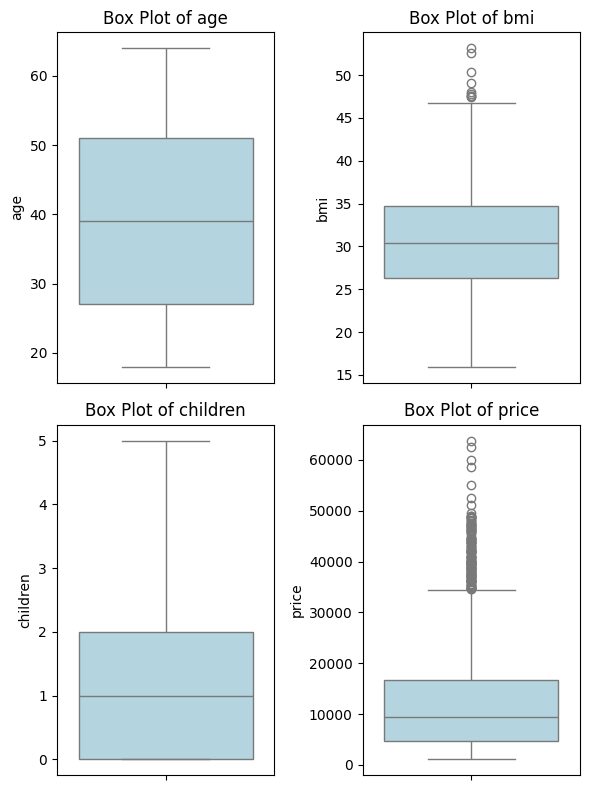

In [27]:
num_vars = ['age', 'bmi', 'children', 'price']

plt.figure(figsize=(6, 8))

for i, col in enumerate(num_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=nodup_df[col], color='lightblue')  
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col) 
plt.tight_layout()
plt.show()


# I created a set of box plots using a subplot layout. These plots reveal that both the price and bmi variables contain some outliers, represented by points outside the typical range of values.

# 🚨📈 Q7) Outlier detection using LOF:

In [37]:

n_neighbors_values = [5, 10, 20, 30, 40, 50]  
num_vars = ['age', 'bmi', 'children']  

outlier_indices = []

for n_neighbors in n_neighbors_values:
    lof = LocalOutlierFactor(n_neighbors=n_neighbors)
    outliers = lof.fit_predict(nodup_df[num_vars])
    outliers_df = nodup_df[outliers == -1]
    outlier_indices.extend(outliers_df.index.tolist())

    print(f"Outliers detected for n_neighbors={n_neighbors}: {outliers_df.shape[0]} outliers")


Outliers detected for n_neighbors=5: 17 outliers
Outliers detected for n_neighbors=10: 12 outliers
Outliers detected for n_neighbors=20: 12 outliers
Outliers detected for n_neighbors=30: 8 outliers
Outliers detected for n_neighbors=40: 7 outliers
Outliers detected for n_neighbors=50: 8 outliers


In [43]:

n_neighbors = 40  
num_vars = ['age', 'bmi', 'children']  

lof = LocalOutlierFactor(n_neighbors=n_neighbors)
outliers = lof.fit_predict(nodup_df[num_vars])
outliers_df = nodup_df[outliers == -1]

print(f"Outliers detected for n_neighbors={n_neighbors}: {outliers_df.shape[0]} outliers")

final_df = nodup_df[outliers != -1].copy()
print("Updated DataFrame 'final_df' after removing outliers for n_neighbors=40:")
final_df.head()


Outliers detected for n_neighbors=40: 7 outliers
Updated DataFrame 'final_df' after removing outliers for n_neighbors=40:


,age,gender,bmi,children,smoker,area,price
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
df.shape, nodup_df.shape, final_df.shape

((1338, 7), (1337, 7), (1330, 7))

# After testing various values for n_neighbors, I determined that n_neighbors=40 resulted in the fewest outliers, specifically 7 outliers. Then, I removed these 7 outliers from nodup_df, creating final_df with 1330 rows and 7 columns for further analysis.

# 📈🤝 Q8) Bivariate analysis: 

# a) Gender & Smoker Analysis:

# Null Hypothesis (H0): The two categorical variables ('gender' and 'smoker') are independent.

In [47]:
var1 = "gender"
var2 = "smoker"

crosstab = pd.crosstab(final_df[var1], final_df[var2])
print(crosstab)

p_value = chi2_contingency(crosstab)[1]

if p_value <= 0.05:
    print(f"The p-value for the chi-square test of independence is {p_value}. "
          f"As this is less than 0.05, we reject the null hypothesis that "
          f"{var1} and {var2} are independent. Therefore, we conclude that, {var1} and {var2} are dependent.")
else:
    print(f"The p-value for the chi-square test of independence is {p_value}. "
          f"As this is greater than 0.05, we accept the null hypothesis that "
          f"{var1} and {var2} are independent.")


smoker   no  yes
gender          
female  546  115
male    511  158
The p-value for the chi-square test of independence is 0.006144767583279299. As this is less than 0.05, we reject the null hypothesis that gender and smoker are independent. Therefore, we conclude that, gender and smoker are dependent.


# Since the p-value (0.006) is less than 0.05, we reject the null hypothesis, concluding that gender and smoker are dependent.

# b) Age & BMI Analysis:

In [49]:
final_df[['age', 'bmi']].corr()

,age,bmi
age,1.000000,0.116292
bmi,0.116292,1.000000


# There is a weak positive relationship. Indicates that age does not strongly influence BMI in the dataset. 

# 🔍📈 Q9) Collinearity and multi-collinearity 

In [51]:

num_vars = final_df.select_dtypes(include='number').columns  

corr_matrix = final_df[num_vars].corr()

corr_matrix


,age,bmi,children,price
age,1.000000,0.116292,0.047725,0.299000
bmi,0.116292,1.000000,0.017592,0.199488
children,0.047725,0.017592,1.000000,0.070341
price,0.299000,0.199488,0.070341,1.000000


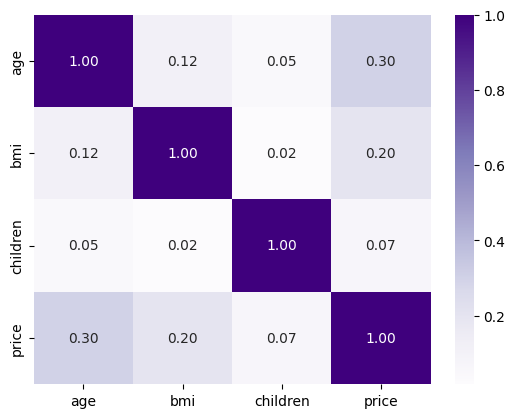

In [52]:
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f')
plt.show()

# There are no collinearity concerns in this dataset, as all correlations between variables are weak.

In [59]:

num_vars = final_df.select_dtypes(include='number').columns  

X = final_df[num_vars]

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,Feature,VIF
0,age,8.247083
1,bmi,8.190867
2,children,1.810800
3,price,2.481353


# Age and BMI have VIF values around 8, which is above the typical threshold of 5 but below 10. This indicates a moderate level of multicollinearity between these two variables. Children and Price have VIF values well below 5, indicating no multicollinearity concern.

# 🔠 Q10) Encode the dataset:

In [60]:

cat_vars = final_df.select_dtypes(include='object').columns  

X = final_df.drop(['price'], axis=1)
y = final_df['price']

X_encoded = pd.get_dummies(X, columns=cat_vars, drop_first=True)

X_encoded.head()


,age,bmi,children,gender_male,smoker_yes,area_northwest,area_southeast,area_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [61]:
print("Encoded X shape:", X_encoded.shape)
print("Encoded X data types:\n", X_encoded.dtypes)

Encoded X shape: (1330, 8)
Encoded X data types:
 age                 int64
bmi               float64
children            int64
gender_male          bool
smoker_yes           bool
area_northwest       bool
area_southeast       bool
area_southwest       bool
dtype: object


In [62]:
y.dtypes

dtype('float64')

# After encoding the categorical variables using one-hot encoding with pd.get_dummies(), the categorical features were transformed into numerical format, with the first category dropped to avoid multicollinearity, resulting in a new DataFrame X_encoded

# ➗ Q11) Split the dataset:

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((1064, 8), (266, 8))

# Split the dataset into training and testing sets using train_test_split(), allocating 80% of the data for training (X_train, y_train) and 20% for testing (X_test, y_test).

# 🔧 Q12) Scaling:

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print('X_train_scaled_df:', X_train_scaled_df.shape)
print('X_test_scaled_df:', X_test_scaled_df.shape)

X_train_scaled_df: (1064, 8)
X_test_scaled_df: (266, 8)


# To ensure that all features contribute equally to the model, I initialized a StandardScaler to standardize the features and applied it to both the training data (X_train) and test data (X_test) for consistent scaling. I then created new DataFrames for the scaled data and displayed their shapes for confirmation.

# *********************************************************************

# 🔍 13) Performing PCA:

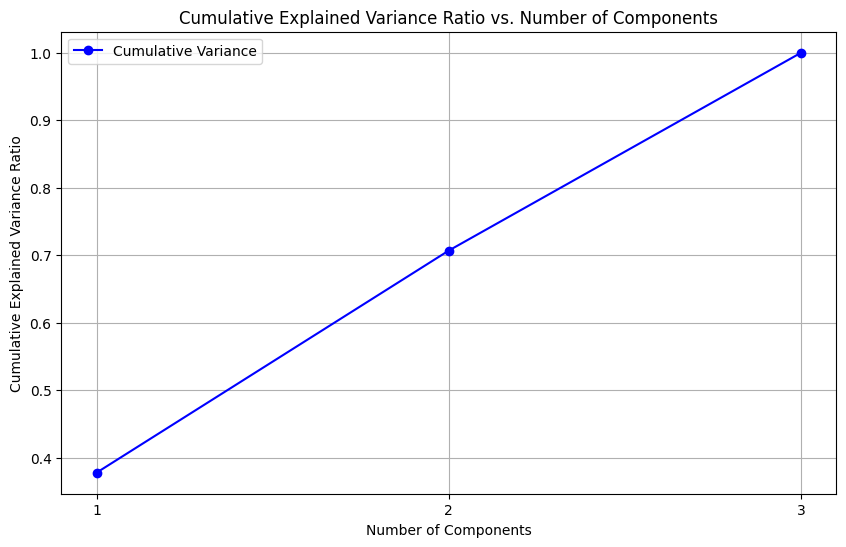

Explained variance ratios for all components:
PC1 explained variance ratio: 0.38
PC2 explained variance ratio: 0.33
PC3 explained variance ratio: 0.29


In [70]:
num_vars = final_df.select_dtypes(include='number').columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_df[num_vars].drop('price', axis=1))

pca = PCA()
pca_result = pca.fit_transform(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-', label='Cumulative Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))  
plt.grid(True)
plt.legend()
plt.show()

print("Explained variance ratios for all components:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1} explained variance ratio: {ratio:.2f}")


# As PC1 and PC2 together explain 71% of the variance, I will retain these two components because they capture the majority of the dataset's variability and this allows us to reduce the number of features (dimensions) in the data without losing much information. By focusing on these two principal components, I can reduce the dimensionality of the data while preserving most of the meaningful information, making the analysis simpler and more efficient without sacrificing significant insights.

# ************************************************************************

# 🌳 Q14.1) "Optimizing Decision Tree Regressor" 

# "Optimizing Max Depth for the Decision Tree Model"

Best Parameters: {'max_depth': 3}
Best Cross-Validated R²: 0.8307
Test Set Adjusted R² (Best Model): 0.8533


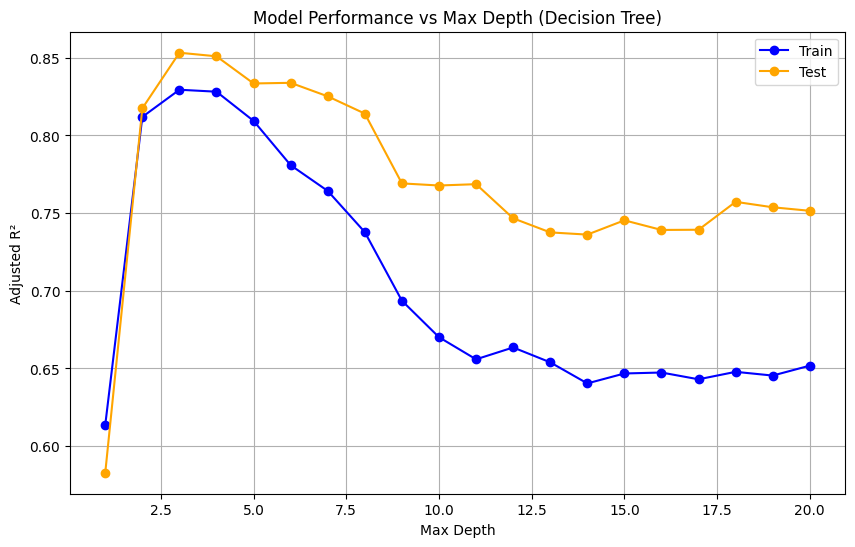

In [72]:

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)
max_depth_range = range(1, 21)
param_grid = {"max_depth": max_depth_range}
regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    scoring='r2',  
    cv=5,  
    n_jobs=-1)
grid_search.fit(X_train, y_train)
cv_results = grid_search.cv_results_
best_params = grid_search.best_params_
best_score = grid_search.best_score_
cv_adjusted_r2 = [
    adjusted_r2(mean_score, X_train.shape[0], X_train.shape[1])
    for mean_score in cv_results['mean_test_score']]

test_adjusted_r2_scores = []
for max_depth in max_depth_range:
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    regressor.fit(X_train, y_train)
    test_r2 = r2_score(y_test, regressor.predict(X_test))
    test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])
    test_adjusted_r2_scores.append(test_adjusted_r2)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated R²: {best_score:.4f}")
print(f"Test Set Adjusted R² (Best Model): {adjusted_r2(r2_score(y_test, grid_search.best_estimator_.predict(X_test)), X_test.shape[0], X_test.shape[1]):.4f}")

plt.figure(figsize=(10, 6))
plt.plot(
    max_depth_range,
    cv_adjusted_r2,
    label="Train",
    marker='o',
    color='blue')
plt.plot(
    max_depth_range,
    test_adjusted_r2_scores,
    label="Test",
    marker='o',
    color='orange')
plt.xlabel('Max Depth')
plt.ylabel('Adjusted R²')
plt.title('Model Performance vs Max Depth (Decision Tree)')
plt.legend()
plt.grid(True)
plt.show()


# After evaluating max_depth values in the range of 1 to 20, the optimal model, with a max_depth of 3, achieved a cross-validated of 0.8307 and a test set adjusted R² of 0.8533, indicating strong performance and good generalization. The model is not overfitting, as the test set performance is higher than the training performance, suggesting a balanced and effective model.

# "Optimizing Max Features for the Decision Tree Model"

Best Parameters: {'max_features': 0.4}
Best Cross-Validated R²: 0.7266
Test Set Adjusted R² (Best Model): 0.7423


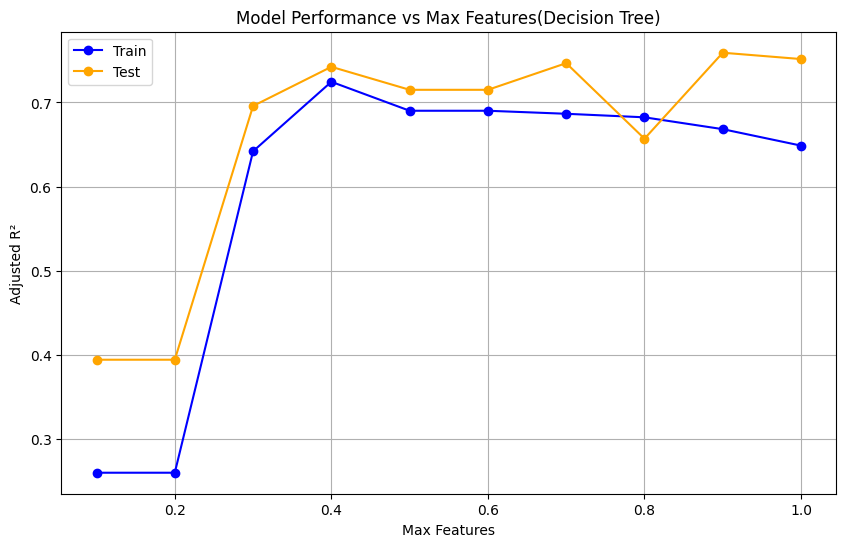

In [105]:

max_features_range = np.linspace(0.1, 1.0, 10)
param_grid = {'max_features': max_features_range}
regressor_2 = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=regressor_2,
    param_grid=param_grid,
    scoring='r2',  
    cv=5,          
    n_jobs=-1)
grid_search.fit(X_train, y_train)
cv_results = grid_search.cv_results_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

cv_adjusted_r2 = [
    adjusted_r2(mean_score, X_train.shape[0], X_train.shape[1])
    for mean_score in cv_results['mean_test_score']]

test_adjusted_r2_scores = []
for max_features in max_features_range:
    regressor_2 = DecisionTreeRegressor(max_features=max_features, random_state=42)
    regressor_2.fit(X_train, y_train)
    test_r2 = r2_score(y_test, regressor_2.predict(X_test))
    test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])
    test_adjusted_r2_scores.append(test_adjusted_r2)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated R²: {best_score:.4f}")
print(f"Test Set Adjusted R² (Best Model): {adjusted_r2(r2_score(y_test, grid_search.best_estimator_.predict(X_test)), X_test.shape[0], X_test.shape[1]):.4f}")

plt.figure(figsize=(10, 6))
plt.plot(
    max_features_range,
    cv_adjusted_r2,
    label="Train",
    marker='o',
    color='blue')
plt.plot(
    max_features_range,
    test_adjusted_r2_scores,
    label="Test",
    marker='o',
    color='orange')
plt.xlabel('Max Features')
plt.ylabel('Adjusted R²')
plt.title('Model Performance vs Max Features(Decision Tree)')
plt.legend()
plt.grid(True)
plt.show()


# The optimal max_features value of 0.4 display a good balance between model performance and generalization. This is reflected in the cross-validated R² of 0.7266 and a test set adjusted R² of 0.7423, indicating good performance on unseen data without overfitting.

# "Optimizing Min Samples Split for the Decision Tree Model"

Best Parameters: {'min_samples_split': 80}
Best Cross-Validated R²: 0.8325
Test Set Adjusted R² (Best Model): 0.8404


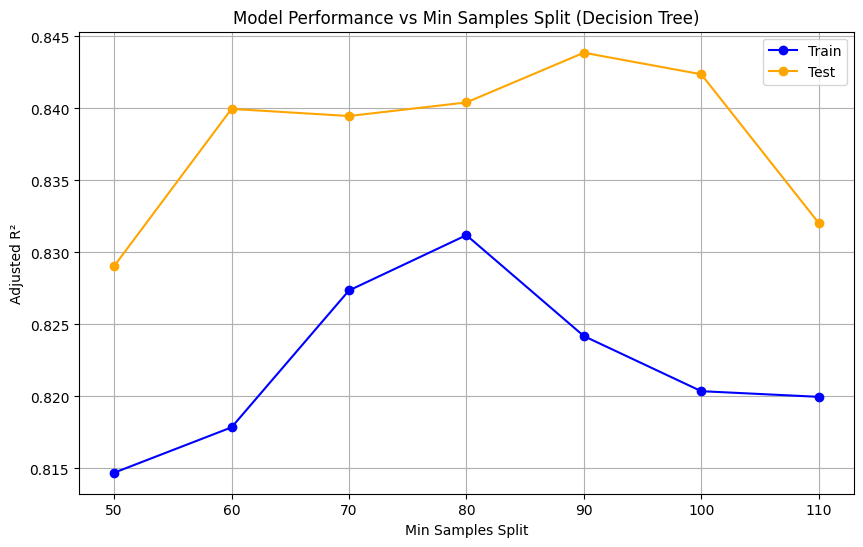

In [73]:

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)
min_samples_split_range = range(50, 120, 10)
param_grid = {'min_samples_split': min_samples_split_range}
regressor_3 = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=regressor_3,
    param_grid=param_grid,
    scoring='r2',  
    cv=5,          
    n_jobs=-1)
grid_search.fit(X_train, y_train)
cv_results = grid_search.cv_results_
best_params = grid_search.best_params_
best_score = grid_search.best_score_
cv_adjusted_r2 = [
    adjusted_r2(mean_score, X_train.shape[0], X_train.shape[1])
    for mean_score in cv_results['mean_test_score']]

test_adjusted_r2_scores = []
for min_samples_split in min_samples_split_range:
    regressor_3 = DecisionTreeRegressor(min_samples_split=min_samples_split, random_state=42)
    regressor_3.fit(X_train, y_train)
    test_r2 = r2_score(y_test, regressor_3.predict(X_test))
    test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])
    test_adjusted_r2_scores.append(test_adjusted_r2)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated R²: {best_score:.4f}")
print(f"Test Set Adjusted R² (Best Model): {adjusted_r2(r2_score(y_test, grid_search.best_estimator_.predict(X_test)), X_test.shape[0], X_test.shape[1]):.4f}")

plt.figure(figsize=(10, 6))
plt.plot(
    min_samples_split_range,
    cv_adjusted_r2,
    label="Train",
    marker='o',
    color='blue')
plt.plot(
    min_samples_split_range,
    test_adjusted_r2_scores,
    label="Test",
    marker='o',
    color='orange')
plt.xlabel('Min Samples Split')
plt.ylabel('Adjusted R²')
plt.title('Model Performance vs Min Samples Split (Decision Tree)')
plt.legend()
plt.grid(True)
plt.show()


# The optimal min_samples_split value of 80 strikes a balance between model complexity and performance, achieving a high test Adjusted R² of 0.8404 and a cross-validated R² of 0.8325. The small gap between these scores highlights the model's ability to generalize effectively to unseen data, avoiding overfitting.

# 📊🌳 "Performance Evaluation of Decision Tree Regressor"

In [107]:

def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)
param_grid = {
    "max_depth": [2, 3, 5, 7],
    "max_features": [0.2, 0.3, 0.4, 0.5, 0.6],
    "min_samples_split": [70, 75, 80, 85, 90]}

regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid, 
    cv=5,          
    n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_results = grid_search.cv_results_
mean_cv_r2 = np.mean(cv_results['mean_test_score'])

train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

train_adjusted_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

train_rmse_value = rmse(y_train, train_preds)
test_rmse_value = rmse(y_test, test_preds)

print(f"Best Parameters: {best_params}")

metrics_df = pd.DataFrame({
    'Metric': [
        'Train R²', 'Test R²', 
        'Train Adjusted R²', 'Test Adjusted R²', 
        'Train RMSE', 'Test RMSE', 
        'Cross-Validation'],
    'Value': [
        round(train_r2, 2),
        round(test_r2, 2),
        round(train_adjusted_r2, 2),
        round(test_adjusted_r2, 2),
        round(train_rmse_value, 2),
        round(test_rmse_value, 2),
        round(mean_cv_r2, 2)]
})

metrics_df


Best Parameters: {'max_depth': 5, 'max_features': 0.4, 'min_samples_split': 70}


,Metric,Value
0,Train R²,0.81
1,Test R²,0.78
2,Train Adjusted R²,0.80
3,Test Adjusted R²,0.78
4,Train RMSE,5350.07
5,Test RMSE,5500.85
6,Cross-Validation,0.66


# I tuned the model using three hyperparameters with different values, including the optimal values I previously identified. The optimal parameters are:{'max_depth': 5, 'max_features': 0.4, 'min_samples_split': 70}. As a result, the fact that the train performance (R²) is higher than the test performance, suggests the presence of mild overfitting.

# ******************************************************

# 🌲🔧📊 Q14.2.a) "Optimizing and Evaluating Random Forest Regressor"

# "Random Forest Max Depth Tuning"

Best Parameters: {'max_depth': 4}
Best Cross-Validated R²: 0.8501
Test Set Adjusted R² (Best Model): 0.8543


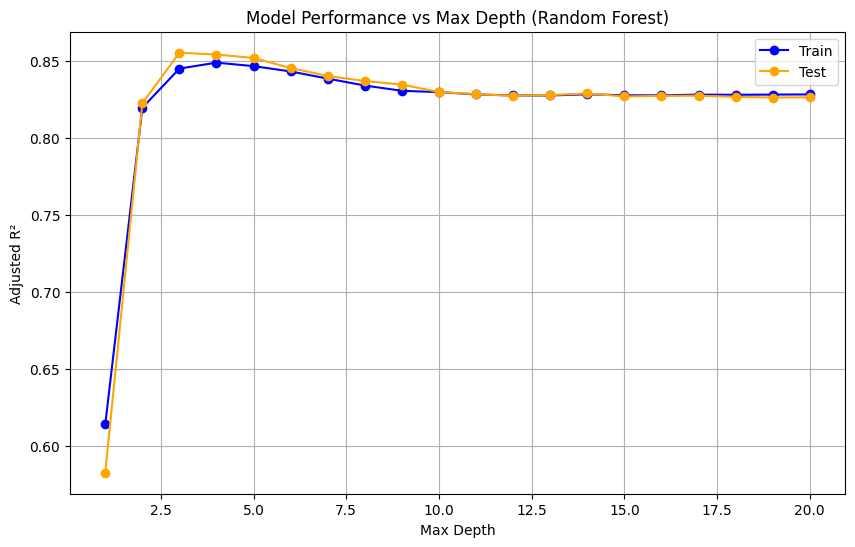

In [111]:

max_depth_range = range(1, 21)
param_grid = {'max_depth': max_depth_range}
regressor_4 = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=regressor_4,
    param_grid=param_grid,  
    cv=5,         
    n_jobs=-1)
grid_search.fit(X_train, y_train)
cv_results = grid_search.cv_results_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)
cv_adjusted_r2 = [
    adjusted_r2(mean_score, X_train.shape[0], X_train.shape[1])
    for mean_score in cv_results['mean_test_score']]

test_adjusted_r2_scores = []
for max_depth in max_depth_range:
    regressor_4 = RandomForestRegressor(max_depth=max_depth, random_state=42)
    regressor_4.fit(X_train, y_train)
    test_r2 = r2_score(y_test, regressor_4.predict(X_test))
    test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])
    test_adjusted_r2_scores.append(test_adjusted_r2)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated R²: {best_score:.4f}")
best_test_r2 = r2_score(y_test, grid_search.best_estimator_.predict(X_test))
best_test_adjusted_r2 = adjusted_r2(best_test_r2, X_test.shape[0], X_test.shape[1])
print(f"Test Set Adjusted R² (Best Model): {best_test_adjusted_r2:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(
    max_depth_range,
    cv_adjusted_r2,
    label="Train",
    marker='o',
    color='blue')
plt.plot(
    max_depth_range,
    test_adjusted_r2_scores,
    label="Test",
    marker='o',
    color='orange')
plt.xlabel('Max Depth')
plt.ylabel('Adjusted R²')
plt.title('Model Performance vs Max Depth (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


# After testing various max_depth values from 1 to 20, the optimal value for the Random Forest model is found to be 4, with a cross-validated R² of 0.8501 and a test set adjusted R² of 0.8543. While the test set performance is slightly better than the cross-validation performance, suggesting that the model generalizes well, with no overfitting.

# "Random Forest Max Features Tuning"

Best Parameters: {'max_features': 0.5}
Best Cross-Validated R²: 0.8446
Test Set Adjusted R² (Best Model): 0.8416


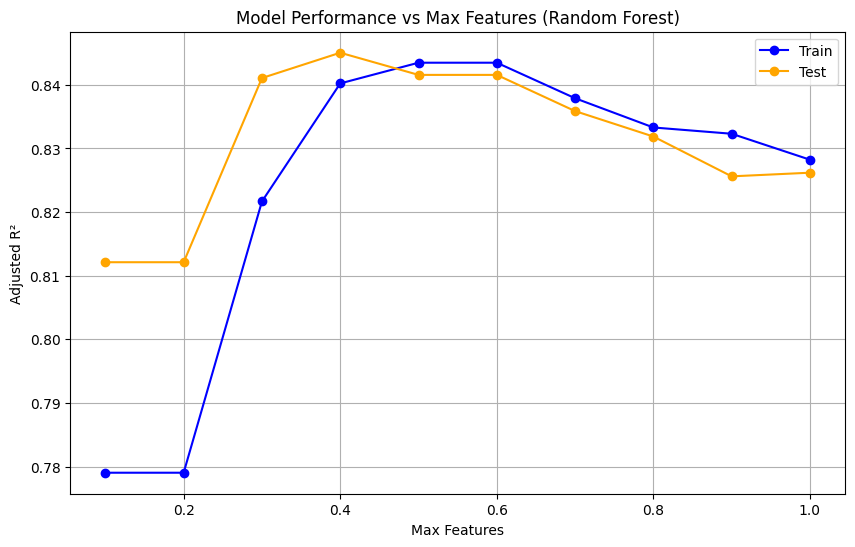

In [112]:

max_features_range = np.linspace(0.1, 1.0, 10)
param_grid = {'max_features': max_features_range}
regressor_5 = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=regressor_5,
    param_grid=param_grid, 
    cv=5,          
    n_jobs=-1)
grid_search.fit(X_train, y_train)
cv_results = grid_search.cv_results_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

cv_adjusted_r2 = [
    adjusted_r2(mean_score, X_train.shape[0], X_train.shape[1])
    for mean_score in cv_results['mean_test_score']]

test_adjusted_r2_scores = []
for max_features in max_features_range:
    regressor_5 = RandomForestRegressor(max_features=max_features, random_state=42)
    regressor_5.fit(X_train, y_train)
    test_r2 = r2_score(y_test, regressor_5.predict(X_test))
    test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])
    test_adjusted_r2_scores.append(test_adjusted_r2)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated R²: {best_score:.4f}")
best_test_r2 = r2_score(y_test, grid_search.best_estimator_.predict(X_test))
best_test_adjusted_r2 = adjusted_r2(best_test_r2, X_test.shape[0], X_test.shape[1])
print(f"Test Set Adjusted R² (Best Model): {best_test_adjusted_r2:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(
    max_features_range,
    cv_adjusted_r2,
    label="Train",
    marker='o',
    color='blue')
plt.plot(
    max_features_range,
    test_adjusted_r2_scores,
    label="Test",
    marker='o',
    color='orange')
plt.xlabel('Max Features')
plt.ylabel('Adjusted R²')
plt.title('Model Performance vs Max Features (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


# After testing various max_features values, the optimal value for max_features in the Random Forest model is 0.5, as indicated by the best cross-validated R² of 0.8446. The test set adjusted R² for the best model is 0.8416, which is very close to the cross-validation result. This demonstrates that the model performs well on both the training data and the unseen test set, with strong generalization and minimal signs of overfitting.

# "Random Forest Min Samples Split Tuning"

Best Parameters: {'min_samples_split': 42}
Best Cross-Validated R²: 0.8492
Test Set Adjusted R² (Best Model): 0.8491


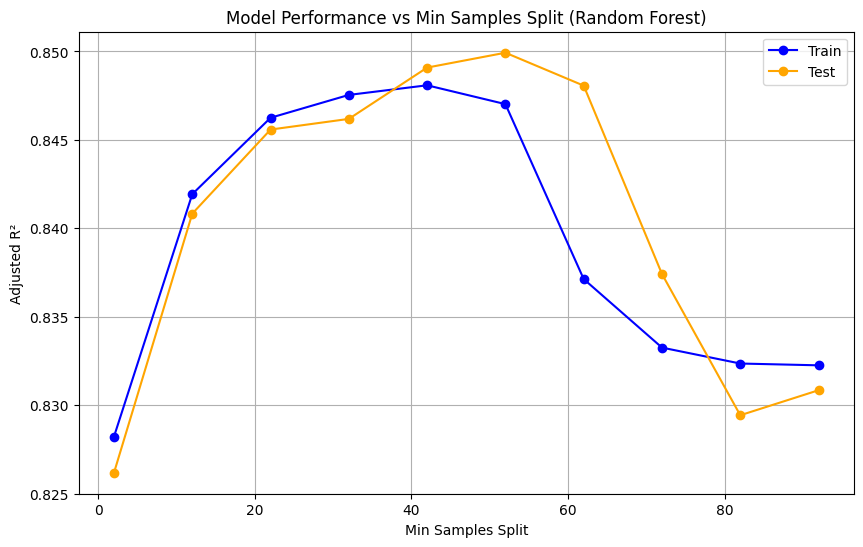

In [80]:

min_samples_split_range = range(2, 101, 10)
param_grid = {'min_samples_split': min_samples_split_range}

regressor_6 = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=regressor_6,
    param_grid=param_grid,  
    cv=5,         
    n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_results = grid_search.cv_results_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

cv_adjusted_r2 = [
    adjusted_r2(mean_score, X_train.shape[0], X_train.shape[1])
    for mean_score in cv_results['mean_test_score']]

test_adjusted_r2_scores = []
for min_samples_split in min_samples_split_range:
    regressor_6 = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)
    regressor_6.fit(X_train, y_train)
    test_r2 = r2_score(y_test, regressor_6.predict(X_test))
    test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])
    test_adjusted_r2_scores.append(test_adjusted_r2)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated R²: {best_score:.4f}")
best_test_r2 = r2_score(y_test, grid_search.best_estimator_.predict(X_test))
best_test_adjusted_r2 = adjusted_r2(best_test_r2, X_test.shape[0], X_test.shape[1])
print(f"Test Set Adjusted R² (Best Model): {best_test_adjusted_r2:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(
    min_samples_split_range,
    cv_adjusted_r2,
    label="Train",
    marker='o',
    color='blue')
plt.plot(
    min_samples_split_range,
    test_adjusted_r2_scores,
    label="Test",
    marker='o',
    color='orange')
plt.xlabel('Min Samples Split')
plt.ylabel('Adjusted R²')
plt.title('Model Performance vs Min Samples Split (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


# The best min_samples_split value for the Random Forest model is 42, with a cross-validated R² of 0.8492 and a test set adjusted R² of 0.8491, indicating excellent performance and strong generalization, and overfitting is not a concern.

# ""Random Forest Model Evaluation and Performance Metrics"

In [84]:

def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)
param_grid = {
    "max_depth": [2, 3, 4, 5, 7],
    "max_features": [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    "min_samples_split": [10, 20, 30, 42, 50, 60]}

regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid, 
    cv=5,          
    n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_results = grid_search.cv_results_
mean_cv_r2 = np.mean(cv_results['mean_test_score'])

train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

train_adjusted_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

train_rmse_value = rmse(y_train, train_preds)
test_rmse_value = rmse(y_test, test_preds)

print(f"Best Parameters: {best_params}")

metrics_df = pd.DataFrame({
    'Metric': [
        'Train R²', 'Test R²', 
        'Train Adjusted R²', 'Test Adjusted R²', 
        'Train RMSE', 'Test RMSE', 
        'Cross-Validation'],
    'Value': [
        round(train_r2, 2),
        round(test_r2, 2),
        round(train_adjusted_r2, 2),
        round(test_adjusted_r2, 2),
        round(train_rmse_value, 2),
        round(test_rmse_value, 2),
        round(mean_cv_r2, 2)]})

metrics_df


Best Parameters: {'max_depth': 4, 'max_features': 0.8, 'min_samples_split': 20}


,Metric,Value
0,Train R²,0.88
1,Test R²,0.86
2,Train Adjusted R²,0.87
3,Test Adjusted R²,0.86
4,Train RMSE,4290.99
5,Test RMSE,4401.72
6,Cross-Validation,0.79


# # I tuned the model using three hyperparameters with different values, including the optimal values I previously identified. The optimal parameters are:{'max_depth': 4, 'max_features': 0.8, 'min_samples_split': 20}. As a result, the fact that the train performance (R²) is higher than the test performance, suggests the presence of mild overfitting.

# **************************************************************

# 🚀📊 Q14.2.b) Building, tuning and evaluating a XGBoost model

# "Tuning XGBoost Model Based on Max Depth"

Best Parameters: {'max_depth': 2}
Best Cross-Validated R²: 0.8548
Test Set Adjusted R² (Best Model): 0.8576


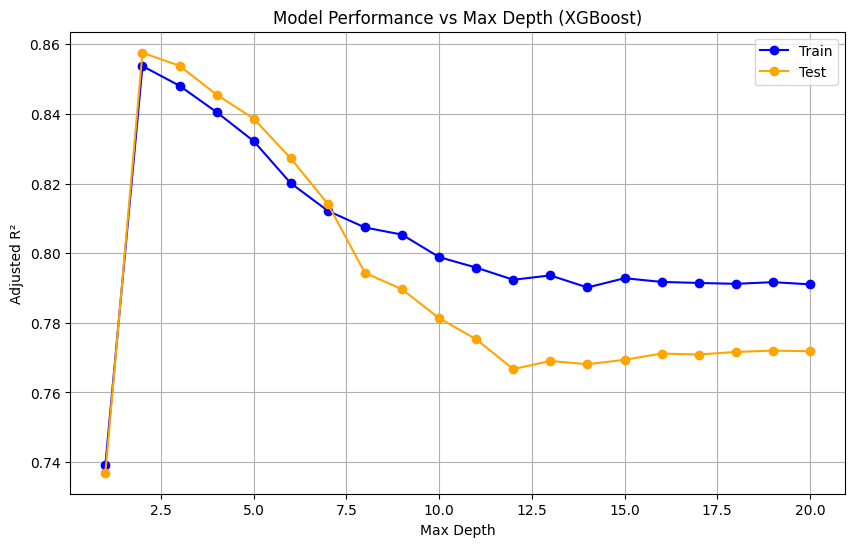

In [87]:

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)
max_depth_range = np.arange(1, 21)
param_grid = {'max_depth': max_depth_range}
regressor = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, n_jobs=-1)
grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid, 
    cv=5,          
    n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_results = grid_search.cv_results_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

cv_adjusted_r2 = [
    adjusted_r2(mean_score, X_train.shape[0], X_train.shape[1])
    for mean_score in cv_results['mean_test_score']]

test_adjusted_r2_scores = []
for max_depth in max_depth_range:
    regressor = XGBRegressor(max_depth=max_depth, random_state=42, n_estimators=100, learning_rate=0.1, n_jobs=-1)
    regressor.fit(X_train, y_train)
    test_r2 = r2_score(y_test, regressor.predict(X_test))
    test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])
    test_adjusted_r2_scores.append(test_adjusted_r2)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated R²: {best_score:.4f}")
print(f"Test Set Adjusted R² (Best Model): {adjusted_r2(r2_score(y_test, grid_search.best_estimator_.predict(X_test)), X_test.shape[0], X_test.shape[1]):.4f}")

plt.figure(figsize=(10, 6))
plt.plot(
    max_depth_range,
    cv_adjusted_r2,
    label="Train",
    marker='o',
    color='blue')
plt.plot(
    max_depth_range,
    test_adjusted_r2_scores,
    label="Test",
    marker='o',
    color='orange')
plt.xlabel('Max Depth')
plt.ylabel('Adjusted R²')
plt.title('Model Performance vs Max Depth (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()


# The optimal max_depth for the XGBoost model is 2, resulting in a best cross-validated R² of 0.8548. The test set adjusted R² for the best model is 0.8576, indicating strong performance and good generalization to unseen data. This suggests that the model is well-regularized, without overfitting.

# "Tuning XGBoost Model Based on Number of Estimators"

Best Parameters: {'n_estimators': 90}
Best Cross-Validated R²: 0.8552
Test Set Adjusted R² (Best Model): 0.8572


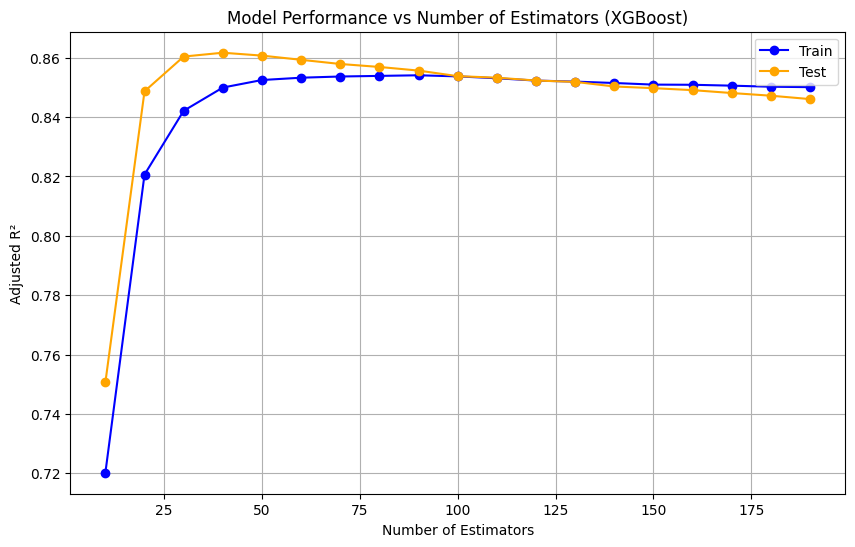

In [89]:

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n_estimators_range = range(10, 200,10)
param_grid = {'n_estimators': n_estimators_range}
regressor = XGBRegressor(random_state=42, max_depth=2, learning_rate=0.1, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    scoring='r2',  
    cv=5,          
    n_jobs=-1)
grid_search.fit(X_train, y_train)

cv_results = grid_search.cv_results_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

cv_adjusted_r2 = [
    adjusted_r2(mean_score, X_train.shape[0], X_train.shape[1])
    for mean_score in cv_results['mean_test_score']]

test_adjusted_r2_scores = []
for n_estimators in n_estimators_range:
    regressor = XGBRegressor(n_estimators=n_estimators, random_state=42, max_depth=3, learning_rate=0.1, n_jobs=-1)
    regressor.fit(X_train, y_train)
    test_r2 = r2_score(y_test, regressor.predict(X_test))
    test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])
    test_adjusted_r2_scores.append(test_adjusted_r2)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated R²: {best_score:.4f}")
print(f"Test Set Adjusted R² (Best Model): {adjusted_r2(r2_score(y_test, grid_search.best_estimator_.predict(X_test)), X_test.shape[0], X_test.shape[1]):.4f}")

plt.figure(figsize=(10, 6))
plt.plot(
    n_estimators_range,
    cv_adjusted_r2,
    label="Train",
    marker='o',
    color='blue')
plt.plot(
    n_estimators_range,
    test_adjusted_r2_scores,
    label="Test",
    marker='o',
    color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('Adjusted R²')
plt.title('Model Performance vs Number of Estimators (XGBoost)')
plt.legend(loc="best")
plt.grid(True)
plt.show()


# The optimal n_estimators for the model is 90, resulting in a best cross-validated R² of 0.8552. The test set adjusted R² for the best model is 0.8572, indicating excellent model performance and strong generalization to new data. This suggests that the model effectively captures underlying patterns without overfitting.

# "Tuning XGBoost Model Based on Learning Rate"

Best Parameters: {'learning_rate': 0.1}
Best Cross-Validated R²: 0.8548
Test Set Adjusted R² (Best Model): 0.8576


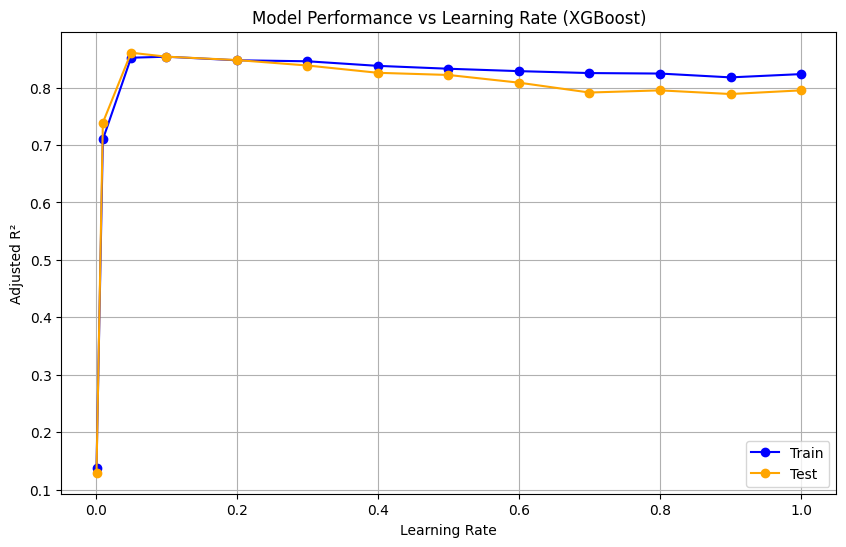

In [136]:

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

learning_rate_range = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = {'learning_rate': learning_rate_range}

regressor = XGBRegressor(random_state=42, max_depth=2, n_estimators=100, n_jobs=-1)
grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    scoring='r2',  
    cv=5,          
    n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_results = grid_search.cv_results_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

cv_adjusted_r2 = [
    adjusted_r2(mean_score, X_train.shape[0], X_train.shape[1])
    for mean_score in cv_results['mean_test_score']]

test_adjusted_r2_scores = []
for learning_rate in learning_rate_range:
    regressor = XGBRegressor(learning_rate=learning_rate, random_state=42, max_depth=3, n_estimators=100, n_jobs=-1)
    regressor.fit(X_train, y_train)
    test_r2 = r2_score(y_test, regressor.predict(X_test))
    test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])
    test_adjusted_r2_scores.append(test_adjusted_r2)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated R²: {best_score:.4f}")
print(f"Test Set Adjusted R² (Best Model): {adjusted_r2(r2_score(y_test, grid_search.best_estimator_.predict(X_test)), X_test.shape[0], X_test.shape[1]):.4f}")

plt.figure(figsize=(10, 6))
plt.plot(
    learning_rate_range,
    cv_adjusted_r2,
    label="Train",
    marker='o',
    color='blue')
plt.plot(
    learning_rate_range,
    test_adjusted_r2_scores,
    label="Test",
    marker='o',
    color='orange')
plt.xlabel('Learning Rate')
plt.ylabel('Adjusted R²')
plt.title('Model Performance vs Learning Rate (XGBoost)')
plt.legend(loc="best")
plt.grid(True)
plt.show()


# After experimenting with various learning rate values, I found that the optimal learning rate for the model is 0.1, as indicated by the best cross-validated R² of 0.8548. The test set adjusted R² for the best model is 0.8576, demonstrating strong performance and good generalization. This suggests that the model effectively balances bias and variance, providing reliable predictions without overfitting.

# "XGBoost Model Performance Evaluation"

In [91]:

def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)
param_grid = {
    "max_depth": [2, 3, 4, 5, 7],
    "n_estimators": [70, 80, 90, 100, 110],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3]}

regressor = XGBRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,  
    cv=5,          
    n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_results = grid_search.cv_results_
mean_cv_r2 = np.mean(cv_results['mean_test_score'])

train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

train_adjusted_r2 = adjusted_r2(train_r2, X_train.shape[0], X_train.shape[1])
test_adjusted_r2 = adjusted_r2(test_r2, X_test.shape[0], X_test.shape[1])

train_rmse_value = rmse(y_train, train_preds)
test_rmse_value = rmse(y_test, test_preds)

print(f"Best Parameters: {best_params}")

metrics_df = pd.DataFrame({'Metric': [
        'Train R²', 'Test R²', 
        'Train Adjusted R²', 'Test Adjusted R²', 
        'Train RMSE', 'Test RMSE', 
        'Cross-Validation R²'],
    'Value': [
        round(train_r2, 2),
        round(test_r2, 2),
        round(train_adjusted_r2, 2),
        round(test_adjusted_r2, 2),
        round(train_rmse_value, 2),
        round(test_rmse_value, 2),
        round(mean_cv_r2, 2)]})

metrics_df


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 90}


,Metric,Value
0,Train R²,0.88
1,Test R²,0.87
2,Train Adjusted R²,0.88
3,Test Adjusted R²,0.86
4,Train RMSE,4177.34
5,Test RMSE,4339.69
6,Cross-Validation R²,0.81


# I tuned the model using three hyperparameters(learning_rate, max_depth, and n_estimators) exploring various values, including those previously identified as optimal. The best parameters identified were: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 90}. The higher train R² compared to the test R² indicates the presence of mild overfitting.

# 📊🌲✨"Comparing Model Performance: DT, RF, & XGB"

In [95]:

data = {'Model': ['Decision Tree', 
        'Random Forest',
        'XGBoost'],
    'cross_validation': [0.66, 0.79, 0.81],
    'train_R2': [0.81, 0.88, 0.88],
    'test_R2': [0.78, 0.86, 0.87],
    'train_Adj_R2': [0.80, 0.87, 0.88],
    'test_Adj_R2': [0.78, 0.86, 0.86],
    'train_RMSE': [5350.07, 4290.99, 4177.34],
    'test_RMSE': [5500.85, 4401.72, 4339.69],
    'Overfitting': ['Yes', 'Yes', 'Yes']}

df = pd.DataFrame(data)

df[['cross_validation', 'train_R2', 'test_R2', 'train_Adj_R2', 'test_Adj_R2', 'train_RMSE', 'test_RMSE']] = df[['cross_validation', 'train_R2', 'test_R2', 'train_Adj_R2', 'test_Adj_R2', 'train_RMSE', 'test_RMSE']].round(2)

df_styled = df.style.format({
    'cross_validation': '{:.2f}',
    'train_R2': '{:.2f}',
    'test_R2': '{:.2f}',
    'train_Adj_R2': '{:.2f}',
    'test_Adj_R2': '{:.2f}',
    'train_RMSE': '{:.2f}',
    'test_RMSE': '{:.2f}'})
df_styled


,Model,cross_validation,train_R2,test_R2,train_Adj_R2,test_Adj_R2,train_RMSE,test_RMSE,Overfitting
0,Decision Tree,0.66,0.81,0.78,0.80,0.78,5350.07,5500.85,Yes
1,Random Forest,0.79,0.88,0.86,0.87,0.86,4290.99,4401.72,Yes
2,XGBoost,0.81,0.88,0.87,0.88,0.86,4177.34,4339.69,Yes


# The XGBoost model has the best performance in terms of cross-validation score and test RMSE, making it the best choice for prediction accuracy. However, it shows slightly more overfitting compared to the Random Forest. If minimizing overfitting is critical, Random Forest could be considered; otherwise, XGBoost is the better overall model.

# 😊Thank You!